<a href="https://colab.research.google.com/github/yastiaisyah/Exploratory-Data-Analysis-with-Python-Cookbook/blob/main/CH6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#Load dataset
url = 'https://raw.githubusercontent.com/PacktPublishing/Exploratory-Data-Analysis-with-Python-Cookbook/main/Ch6/Data/marketing_campaign.csv'
marketing_data = pd.read_csv(url)

#Subset for relevant columns
marketing_data = marketing_data[['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts',
                                 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                                 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases',
                                 'NumWebVisitsMonth']]
#Inspect first 5 rows and data types of the dataset
marketing_data.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,635,88,546,172,88,88,3,8,10,4,7
1,11,1,6,2,1,6,2,1,1,2,5
2,426,49,127,111,21,42,1,8,2,10,4
3,11,4,20,10,3,5,2,2,0,4,6
4,173,43,118,46,27,15,5,5,3,6,5


In [2]:
marketing_data.shape

(2240, 11)

In [3]:
marketing_data.dtypes

MntWines               int64
MntFruits              int64
MntMeatProducts        int64
MntFishProducts        int64
MntSweetProducts       int64
MntGoldProds           int64
NumDealsPurchases      int64
NumWebPurchases        int64
NumCatalogPurchases    int64
NumStorePurchases      int64
NumWebVisitsMonth      int64
dtype: object

In [4]:
#Check for missing values and remove them
marketing_data.isnull().sum()

MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
dtype: int64

In [5]:
#Scale the data
scaler = StandardScaler()
marketing_data_scaled = scaler.fit_transform(marketing_data)
#Build Kmeans model
kmeans = KMeans(n_clusters= 4, init='k-means++',random_state= 1)

kmeans.fit(marketing_data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [9]:
label = kmeans.fit_predict(marketing_data_scaled)
marketing_data_output = marketing_data.copy()
marketing_data_output['cluster'] = label
marketing_data_output['cluster'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    1020
2     475
3     467
1     278
Name: cluster, dtype: int64

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

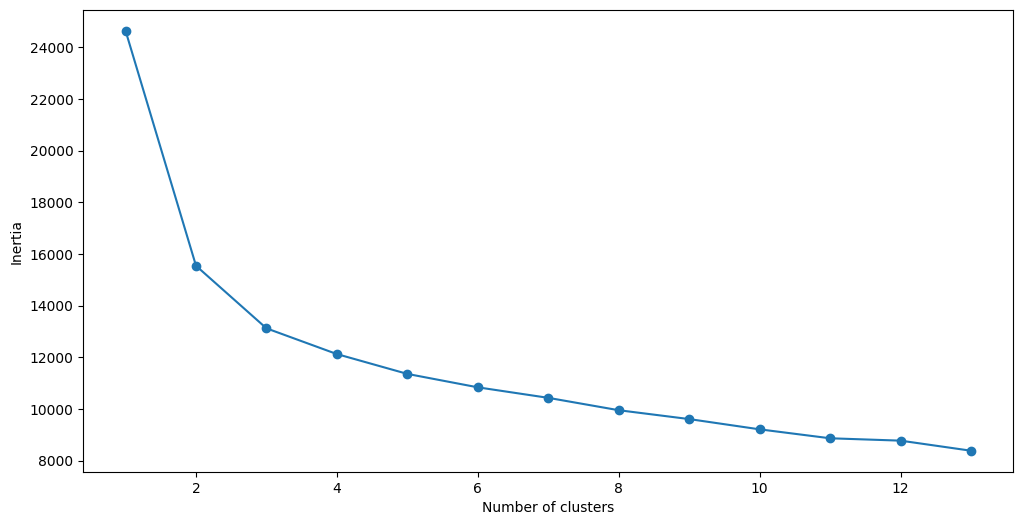

In [10]:
distance_values = []
for cluster in range(1,14):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(marketing_data_scaled)
    distance_values.append(kmeans.inertia_)

cluster_output = pd.DataFrame({'Cluster':range(1,14), 'distance_values':distance_values})
plt.figure(figsize=(12,6))
plt.plot(cluster_output['Cluster'], cluster_output['distance_values'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [11]:
#Profiling Clusters
cols  =['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth']
overall_mean = marketing_data_output[cols].apply(np.mean).T
overall_mean = pd.DataFrame(overall_mean,columns =['overall_average'])
overall_mean

,overall_average
MntWines,303.935714
MntFruits,26.302232
MntMeatProducts,166.950000
MntFishProducts,37.525446
MntSweetProducts,27.062946
MntGoldProds,44.021875
NumDealsPurchases,2.325000
NumWebPurchases,4.084821
NumCatalogPurchases,2.662054
NumStorePurchases,5.790179


In [12]:
cluster_mean = marketing_data_output.groupby('cluster')[cols].mean().T
cluster_mean

cluster,0,1,2,3
MntWines,40.580392,535.892086,627.526316,411.929336
MntFruits,4.913725,98.348921,40.991579,15.188437
MntMeatProducts,21.498039,460.676259,363.021053,110.357602
MntFishProducts,7.219608,133.233813,63.473684,20.351178
MntSweetProducts,5.066667,103.719424,40.835789,15.464668
MntGoldProds,14.696078,98.370504,61.261053,58.186296
NumDealsPurchases,1.869608,1.438849,1.677895,4.505353
NumWebPurchases,2.017647,5.636691,5.277895,6.462527
NumCatalogPurchases,0.556863,5.683453,5.635789,2.436831
NumStorePurchases,3.228431,8.241007,8.713684,6.952891


In [13]:
pd.concat([cluster_mean,overall_mean],axis =1)

,0,1,2,3,overall_average
MntWines,40.580392,535.892086,627.526316,411.929336,303.935714
MntFruits,4.913725,98.348921,40.991579,15.188437,26.302232
MntMeatProducts,21.498039,460.676259,363.021053,110.357602,166.950000
MntFishProducts,7.219608,133.233813,63.473684,20.351178,37.525446
MntSweetProducts,5.066667,103.719424,40.835789,15.464668,27.062946
MntGoldProds,14.696078,98.370504,61.261053,58.186296,44.021875
NumDealsPurchases,1.869608,1.438849,1.677895,4.505353,2.325000
NumWebPurchases,2.017647,5.636691,5.277895,6.462527,4.084821
NumCatalogPurchases,0.556863,5.683453,5.635789,2.436831,2.662054
NumStorePurchases,3.228431,8.241007,8.713684,6.952891,5.790179


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='MntWines', ylabel='MntFruits'>

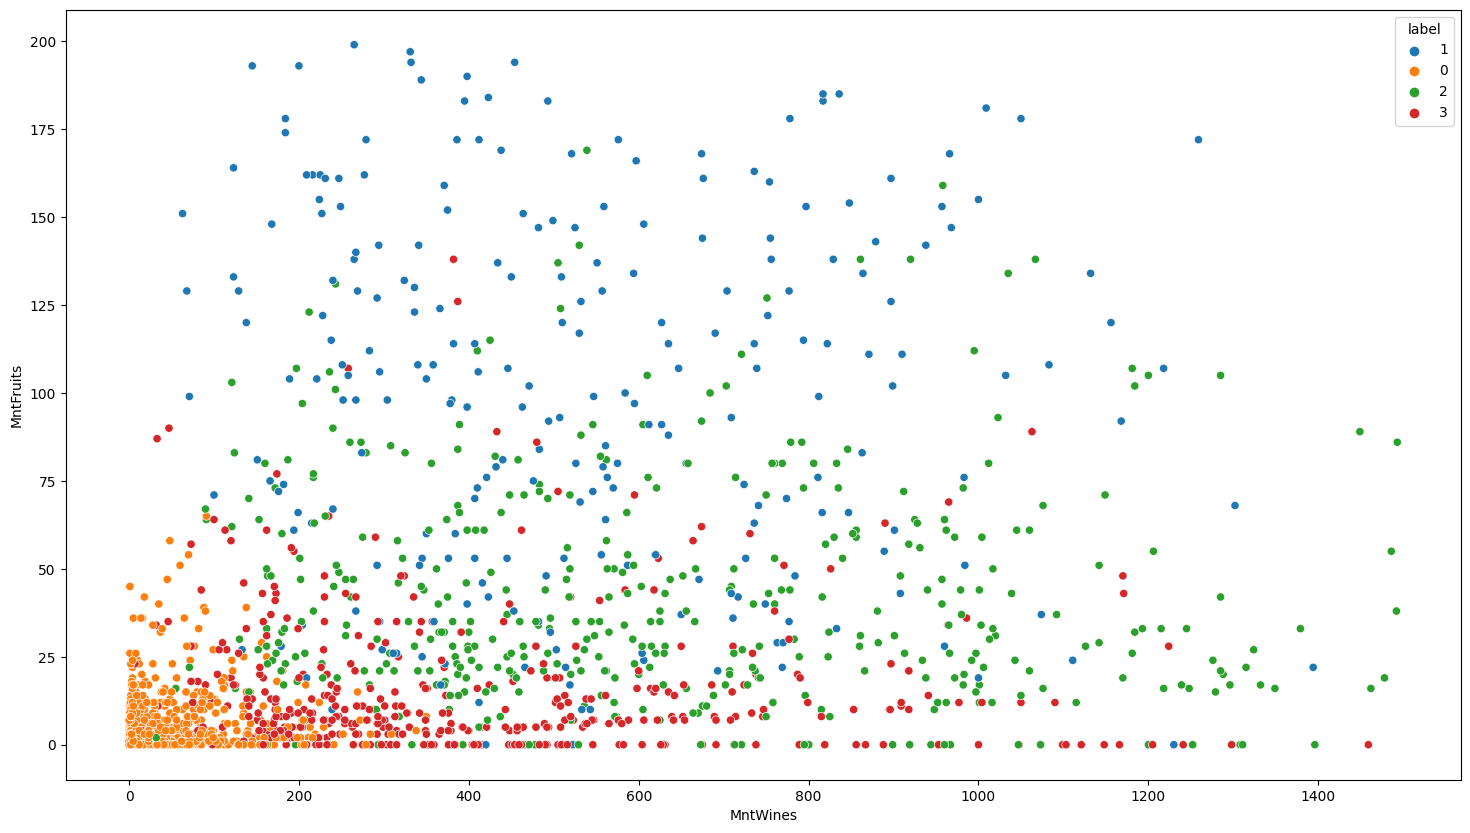

In [8]:
#Visualise Data
label = kmeans.fit_predict(marketing_data_scaled)
marketing_data_test = marketing_data.copy()
marketing_data_test['label'] = label
marketing_data_test['label'] = marketing_data_test['label'].astype(str)
plt.figure(figsize= (18,10))
sns.scatterplot(x= marketing_data_test['MntWines'], y= marketing_data_test['MntFruits'], hue = marketing_data_test['label'])

In [15]:
#Check for missing values and remove them
marketing_data.isnull().sum()

MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
dtype: int64

In [16]:
marketing_data.dropna(inplace=True)
marketing_data.shape

(2240, 11)

In [17]:
#Scale the data
x = marketing_data.values
marketing_data_scaled = StandardScaler().fit_transform(x)
#Apply PCA to the dataset
pca_marketing = PCA(n_components=6,random_state = 1)
principalComponents_marketing = pca_marketing.fit_transform(marketing_data_scaled)
principal_marketing_data = pd.DataFrame(data = principalComponents_marketing
             , columns = ['principal component 1', 'principal component 2',
                          'principal component 3','principal component 4'
                         ,'principal component 5','principal component 6'])
principal_marketing_data

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6
0,3.800461,0.572973,1.254630,1.083547,0.274886,2.368660
1,-2.175610,-0.928702,-0.117578,0.292224,0.323580,-0.105413
2,1.501507,0.123894,0.096791,-0.992810,-1.071276,-0.602728
3,-2.016701,-0.518668,0.025703,0.070743,-0.181590,-0.227872
4,-0.044173,0.763401,0.238572,1.149119,-0.334696,-0.495866
...,...,...,...,...,...,...
2235,2.660651,1.308848,2.151732,-2.178308,1.453732,0.526411
2236,-1.063664,2.738997,-0.463307,0.821222,-0.336517,-0.070777
2237,1.130411,0.004491,-1.519866,-0.539346,-0.947537,-0.493189
2238,1.749883,0.079894,-0.509966,-0.305776,-0.035570,-0.746510


In [19]:
#Check the explained variance
for i in range(0,len(pca_marketing.explained_variance_ratio_)):
    print("Component ",i ," ",pca_marketing.explained_variance_ratio_[i])

Component  0   0.4645665284363646
Component  1   0.1405246545704045
Component  2   0.07516844380951325
Component  3   0.061441728781594616
Component  4   0.05714631700947576
Component  5   0.047436409149406195


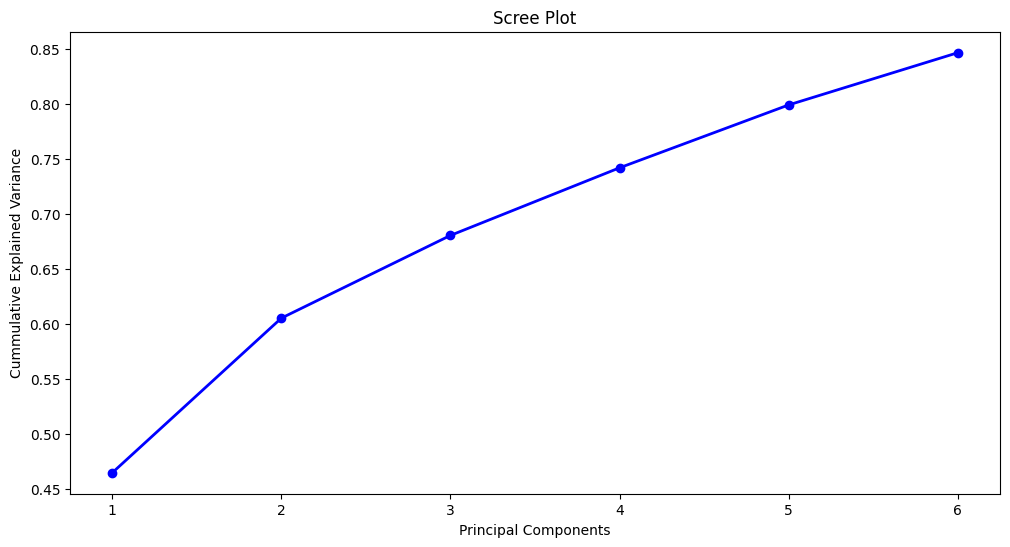

In [20]:
#Create a Scree Plot
plt.figure(figsize= (12,6))

PC_values = np.arange(pca_marketing.n_components_) + 1
cummulative_variance = np.cumsum(pca_marketing.explained_variance_ratio_)
plt.plot(PC_values, cummulative_variance, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Cummulative Explained Variance')
plt.show()

In [21]:
#Check the loadings
loadings_df = pd.DataFrame(pca_marketing.components_).T
loadings_df = loadings_df.set_index(marketing_data.columns)
loadings_df

,0,1,2,3,4,5
MntWines,0.327941,0.222837,-0.435535,-0.208662,-0.087749,0.243052
MntFruits,0.323026,-0.130151,0.376355,0.140996,-0.224386,-0.012065
MntMeatProducts,0.354452,-0.130388,-0.209744,0.305524,0.151587,0.354552
MntFishProducts,0.333163,-0.142444,0.345355,0.150907,-0.049328,0.050934
MntSweetProducts,0.321179,-0.104676,0.363038,0.115690,-0.350306,0.047819
MntGoldProds,0.265813,0.189065,0.405995,-0.416516,0.693513,-0.128306
NumDealsPurchases,-0.042299,0.636331,0.077169,0.661013,0.144609,-0.268801
NumWebPurchases,0.245131,0.493262,0.039387,-0.358028,-0.270322,0.161445
NumCatalogPurchases,0.360813,0.009298,-0.269517,0.235563,0.316932,0.252435
NumStorePurchases,0.329634,0.187143,-0.241080,-0.112152,-0.297203,-0.574865


In [22]:
loadings_df.where(abs(loadings_df) >= 0.35)

,0,1,2,3,4,5
MntWines,NaN,NaN,-0.435535,NaN,NaN,NaN
MntFruits,NaN,NaN,0.376355,NaN,NaN,NaN
MntMeatProducts,0.354452,NaN,NaN,NaN,NaN,0.354552
MntFishProducts,NaN,NaN,NaN,NaN,NaN,NaN
MntSweetProducts,NaN,NaN,0.363038,NaN,-0.350306,NaN
MntGoldProds,NaN,NaN,0.405995,-0.416516,0.693513,NaN
NumDealsPurchases,NaN,0.636331,NaN,0.661013,NaN,NaN
NumWebPurchases,NaN,0.493262,NaN,-0.358028,NaN,NaN
NumCatalogPurchases,0.360813,NaN,NaN,NaN,NaN,NaN
NumStorePurchases,NaN,NaN,NaN,NaN,NaN,-0.574865


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo

#Load dataset
url = 'https://raw.githubusercontent.com/PacktPublishing/Exploratory-Data-Analysis-with-Python-Cookbook/main/Ch6/Data/website_survey.csv'
satisfaction_data = pd.read_csv(url)

#Subset for relevant columns
satisfaction_data = satisfaction_data[['q1', 'q2', 'q3','q4', 'q5', 'q6', 'q7', 'q8', 'q9',
                                       'q10', 'q11', 'q12', 'q13', 'q14','q15', 'q16', 'q17',
                                       'q18', 'q19', 'q20', 'q21', 'q22', 'q23', 'q24','q25', 'q26']]
#Inspect first 5 rows and data types of the dataset
satisfaction_data.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26
0,9,7,6,6,7,7,6,6,5,5,...,8,4,6,5,6,6,5,2,5,3
1,10,10,10,9,10,10,10,10,9,10,...,10,10,10,10,10,10,10,10,9,8
2,10,10,10,10,10,10,10,10,10,10,...,9,8,10,10,10,10,9,9,8,8
3,5,8,5,5,5,5,5,6,6,8,...,7,9,10,8,8,10,10,8,10,6
4,9,10,9,10,9,7,8,5,7,8,...,7,8,8,8,9,9,10,10,10,10


In [29]:
satisfaction_data.shape

(73, 26)

In [30]:
satisfaction_data.dtypes

q1     int64
q2     int64
q3     int64
q4     int64
q5     int64
q6     int64
q7     int64
q8     int64
q9     int64
q10    int64
q11    int64
q12    int64
q13    int64
q14    int64
q15    int64
q16    int64
q17    int64
q18    int64
q19    int64
q20    int64
q21    int64
q22    int64
q23    int64
q24    int64
q25    int64
q26    int64
dtype: object

In [31]:
#Check for missing values and remove them
satisfaction_data.isnull().sum()

q1     0
q2     0
q3     0
q4     0
q5     0
q6     0
q7     0
q8     0
q9     0
q10    0
q11    0
q12    0
q13    0
q14    0
q15    0
q16    0
q17    0
q18    0
q19    0
q20    0
q21    0
q22    0
q23    0
q24    0
q25    0
q26    0
dtype: int64

In [32]:
satisfaction_data.dropna(inplace=True)
satisfaction_data.shape

(73, 26)

In [33]:
#Check for multicollinearity
satisfaction_data.corr()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26
q1,1.000000,0.732557,0.601434,0.566234,0.607621,0.370763,0.459210,0.333309,0.033092,0.069668,...,0.323691,0.280609,0.279557,0.434450,0.460769,0.373225,0.200752,0.213424,0.287148,0.226838
q2,0.732557,1.000000,0.593326,0.739373,0.628895,0.246588,0.349147,0.380736,0.192304,0.258513,...,0.383603,0.297904,0.382702,0.529213,0.522291,0.425659,0.326854,0.240745,0.388849,0.339132
q3,0.601434,0.593326,1.000000,0.647676,0.552131,0.172054,0.308335,0.420688,0.187925,0.157351,...,0.387370,0.341007,0.295327,0.409462,0.497751,0.308314,0.098932,0.238922,0.295704,0.179385
q4,0.566234,0.739373,0.647676,1.000000,0.593274,0.179106,0.218992,0.378380,0.071463,0.149129,...,0.299033,0.308255,0.408938,0.436496,0.489926,0.341183,0.240013,0.241790,0.358909,0.239614
q5,0.607621,0.628895,0.552131,0.593274,1.000000,0.480150,0.500265,0.481930,0.329357,0.273870,...,0.511105,0.367275,0.420468,0.497811,0.471196,0.471106,0.385919,0.357058,0.466934,0.350171
q6,0.370763,0.246588,0.172054,0.179106,0.480150,1.000000,0.666100,0.701205,0.388504,0.437400,...,0.605565,0.247161,0.413837,0.537055,0.481797,0.595427,0.470235,0.429972,0.443095,0.474170
q7,0.459210,0.349147,0.308335,0.218992,0.500265,0.666100,1.000000,0.510057,0.350293,0.307583,...,0.666361,0.448136,0.513304,0.562642,0.508320,0.633145,0.498880,0.535975,0.544221,0.567023
q8,0.333309,0.380736,0.420688,0.378380,0.481930,0.701205,0.510057,1.000000,0.479199,0.482602,...,0.644112,0.450204,0.534457,0.622011,0.647805,0.627109,0.434245,0.434191,0.490195,0.470124
q9,0.033092,0.192304,0.187925,0.071463,0.329357,0.388504,0.350293,0.479199,1.000000,0.568667,...,0.410685,0.479387,0.441629,0.558843,0.510781,0.500321,0.468448,0.417570,0.443989,0.514908
q10,0.069668,0.258513,0.157351,0.149129,0.273870,0.437400,0.307583,0.482602,0.568667,1.000000,...,0.438689,0.447040,0.518413,0.526933,0.390390,0.500343,0.520452,0.446936,0.501505,0.498620


In [34]:
satisfaction_data.corr()[(satisfaction_data.corr()>0.9) & (satisfaction_data.corr()<1)]

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26
q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#Test the suitability of the dataset
kmo_all,kmo_model=calculate_kmo(satisfaction_data)
kmo_model

0.8679550321475638

In [36]:
#Apply Factor Analysis to dataset
fa = FactorAnalyzer(n_factors = 6, rotation="varimax")
fa.fit(satisfaction_data)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [37]:
loadings_output = pd.DataFrame(fa.loadings_,index=satisfaction_data.columns)
loadings_output

,0,1,2,3,4,5
q1,0.091495,0.773220,-0.075197,0.323028,0.025180,-0.011134
q2,0.170028,0.835743,0.138555,0.107889,0.059724,0.043701
q3,0.030677,0.714850,0.035009,0.096148,0.127674,0.218543
q4,0.129466,0.816115,0.068117,-0.029781,0.133684,0.100296
q5,0.190598,0.651182,0.238826,0.368984,0.036734,0.015868
q6,0.216372,0.121810,0.243359,0.804852,0.108610,0.049316
q7,0.412134,0.238174,0.072134,0.625986,0.165875,0.113483
q8,0.184605,0.288331,0.286474,0.525538,0.206809,0.339109
q9,0.294554,0.006791,0.569362,0.226370,-0.114852,0.530618
q10,0.299583,0.045600,0.639910,0.171549,0.224400,0.157741


In [38]:
#Apply Factor Analysis to dataset
fa = FactorAnalyzer(n_factors = 6, rotation="varimax")
fa.fit(satisfaction_data)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [39]:
# Get variance of each factors
pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'])

,0,1,2,3,4,5
Variance,4.480893,3.972976,3.338380,3.249583,1.878285,1.542127
Proportional Var,0.172342,0.152807,0.128399,0.124984,0.072242,0.059313
Cumulative Var,0.172342,0.325149,0.453548,0.578532,0.650774,0.710086


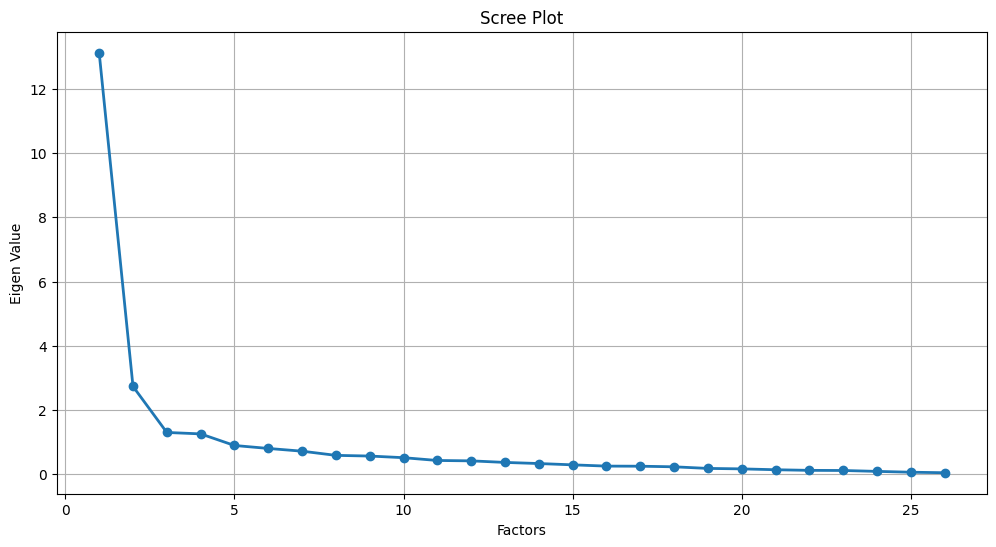

In [41]:
#Create Scree plot
fa = FactorAnalyzer(rotation = 'varimax',n_factors=satisfaction_data.shape[1])
fa.fit(satisfaction_data)
ev,_ = fa.get_eigenvalues()

factor_values = np.arange(satisfaction_data.shape[1]) + 1

plt.figure(figsize= (12,6))

plt.plot(factor_values,ev,'o-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

In [43]:
#Apply Factor Analysis to dataset
fa = FactorAnalyzer(n_factors = 5, rotation="varimax")
fa.fit(satisfaction_data)

FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

In [44]:
#Analyse the factors
loadings_output = pd.DataFrame(fa.loadings_,index=satisfaction_data.columns)
loadings_output

,0,1,2,3,4
q1,0.099961,0.774357,-0.079795,0.321797,0.015576
q2,0.178909,0.836019,0.135454,0.101916,0.063459
q3,0.041438,0.713113,0.055440,0.095694,0.254581
q4,0.146058,0.811110,0.070999,-0.031095,0.166014
q5,0.202457,0.655376,0.237125,0.362648,0.002515
q6,0.239624,0.122927,0.257562,0.802537,0.059996
q7,0.436143,0.237686,0.090813,0.621522,0.151444
q8,0.201393,0.286128,0.332926,0.520492,0.355756
q9,0.253617,0.030815,0.584818,0.208287,0.250758
q10,0.333174,0.045337,0.656804,0.164210,0.182566


In [45]:
loadings_output.where(abs(loadings_output) > 0.5)

,0,1,2,3,4
q1,NaN,0.774357,NaN,NaN,NaN
q2,NaN,0.836019,NaN,NaN,NaN
q3,NaN,0.713113,NaN,NaN,NaN
q4,NaN,0.811110,NaN,NaN,NaN
q5,NaN,0.655376,NaN,NaN,NaN
q6,NaN,NaN,NaN,0.802537,NaN
q7,NaN,NaN,NaN,0.621522,NaN
q8,NaN,NaN,NaN,0.520492,NaN
q9,NaN,NaN,0.584818,NaN,NaN
q10,NaN,NaN,0.656804,NaN,NaN


In [46]:
pd.DataFrame(fa.get_communalities(),index=satisfaction_data.columns,columns=['Communalities'])

,Communalities
q1,0.719784
q2,0.763698
q3,0.587289
q4,0.712800
q5,0.658255
q6,0.786534
q7,0.664188
q8,0.630742
q9,0.513547
q10,0.604748
